In [111]:
import numpy as np
from matplotlib import pyplot as plt
import os
import h5py

In [112]:
loaded_data = np.load('./pi_dfs_data_for_visualization.npz')
min_val = loaded_data['min_val']
max_val = loaded_data['max_val']
input_array_list_array = loaded_data['input_array_list_array']
u_gt_list_array = loaded_data['u_gt_list_array']
pred_ens_list_array = loaded_data['pred_ens_list_array']

In [113]:
print(input_array_list_array.shape)
print(u_gt_list_array.shape)
print(pred_ens_list_array.shape)

(9, 256, 256)
(9, 256, 256)
(9, 256, 256)


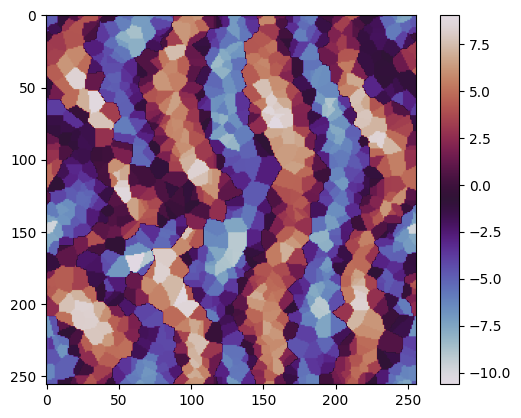

In [114]:
max_value = np.max(input_array_list_array[0])
min_value = np.min(input_array_list_array[0])
plt.imshow(input_array_list_array[0], cmap="twilight", vmin=min_value, vmax=max_value)
plt.colorbar()
plt.show()

In [136]:
def convert_to_3d(array_2d):
    max_value = np.max(array_2d)
    min_value = np.min(array_2d)
    x, y = array_2d.shape
    z = int(abs(min_value)) + int(abs(max_value)) + 1

    array_3d = np.zeros((z, y, x))

    for i in range(x):
        for j in range(y):
            z_index = int(array_2d[i, j]) + int(abs(min_value))
            array_3d[0:z_index, j, i] = 1

    return array_3d


In [142]:
input_3d = convert_to_3d(pred_ens_list_array[0])
with h5py.File("prediction.h5", "w") as h5file:
    h5file.create_dataset("3d", data=input_3d)

print(input_3d.shape)

(19, 256, 256)


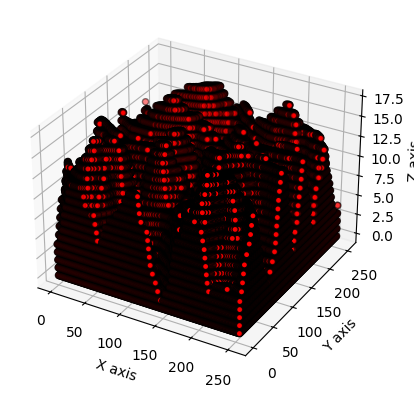

In [143]:
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.where(input_3d == 1)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.voxels(input_3d, facecolors="red", edgecolors="k")
ax.scatter(z, y, x, c="r", edgecolors="k")

# Label axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

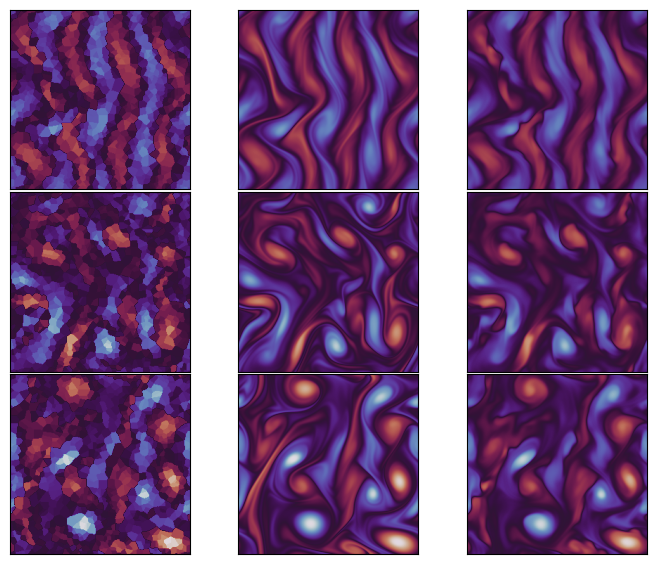

In [34]:
fig, ax = plt.subplots(3, 3)
# plt.subplots_adjust(hspace=0.001)
fig.set_figwidth(7.3)
# fig.set_figheight(4)
fig.set_figheight(5.5)

for m in range(3):
    im = ax[m,0].imshow(input_array_list_array[m*3+1], cmap='twilight', vmin=min_val, vmax=max_val)
    im = ax[m,1].imshow(u_gt_list_array[m*3+1], cmap='twilight', vmin=min_val, vmax=max_val)
    im = ax[m,2].imshow(pred_ens_list_array[m*3+1], cmap='twilight', vmin=min_val, vmax=max_val)
    for n in range(3):
        ax[m,n].get_xaxis().set_visible(False)
        ax[m,n].get_yaxis().set_visible(False)
    # if n == targ_traj.shape[0]-1:
    #     plt.colorbar(im, ax=ax[n,m], orientation="horizontal", fraction=fraction)
    #     # plt.colorbar(im, ax=ax[n,m], orientation="horizontal")
fig.tight_layout(pad=0.2)
# fig.tight_layout(h_pad=0.001)
save_dir = './figures_dfsr/data_sample_visualization.png'
# plt.savefig(os.path.join(file_save_dir, save_dir))
plt.show()
plt.close()